# Exploratory analysis

In [1]:
from skimage.feature.peak import peak_local_max

%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('../data/GEN-SIM_Ele-Eta0-Phi0-Energy50.txt',
                 delim_whitespace=True, header=None)
df.shape

(3000, 2160)

## Energy distributions

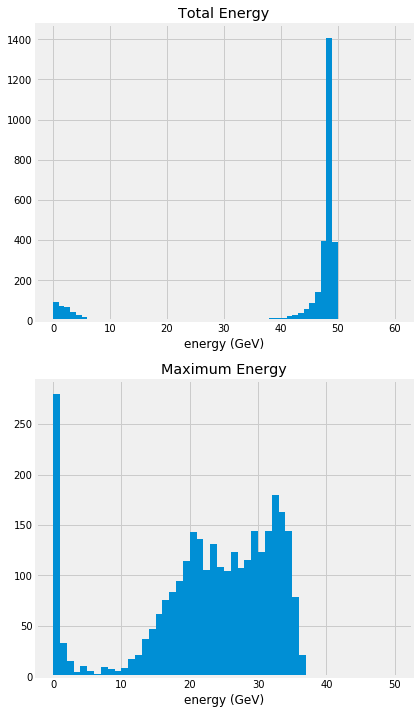

In [3]:
sumenergy = df.sum(axis=1)
maxenergy = df.max(axis=1)

fig, ax = plt.subplots(2, 1, figsize=(6, 12))

ax[0].hist(sumenergy, 60, (0, 60))
ax[0].set_title('Total Energy')
ax[0].set_xlabel('energy (GeV)')

ax[1].hist(maxenergy, 50, (0, 50))
ax[1].set_title('Maximum Energy')
ax[1].set_xlabel('energy (GeV)');

## Calorimeter images

In [4]:
N = 20           # number of images
DIM_ETA = 6      # number of crystals in ETA
DIM_PHI = 360    # number of crystals in PHI

images = np.reshape(df.iloc[:N,:].values, (-1, DIM_ETA, DIM_PHI))
images.shape

(20, 6, 360)

In [5]:
CUT_PHI = 40     # cut number of crystals in PHI

window = np.arange(-CUT_PHI, CUT_PHI)
images = images[..., window]
images.shape

(20, 6, 80)

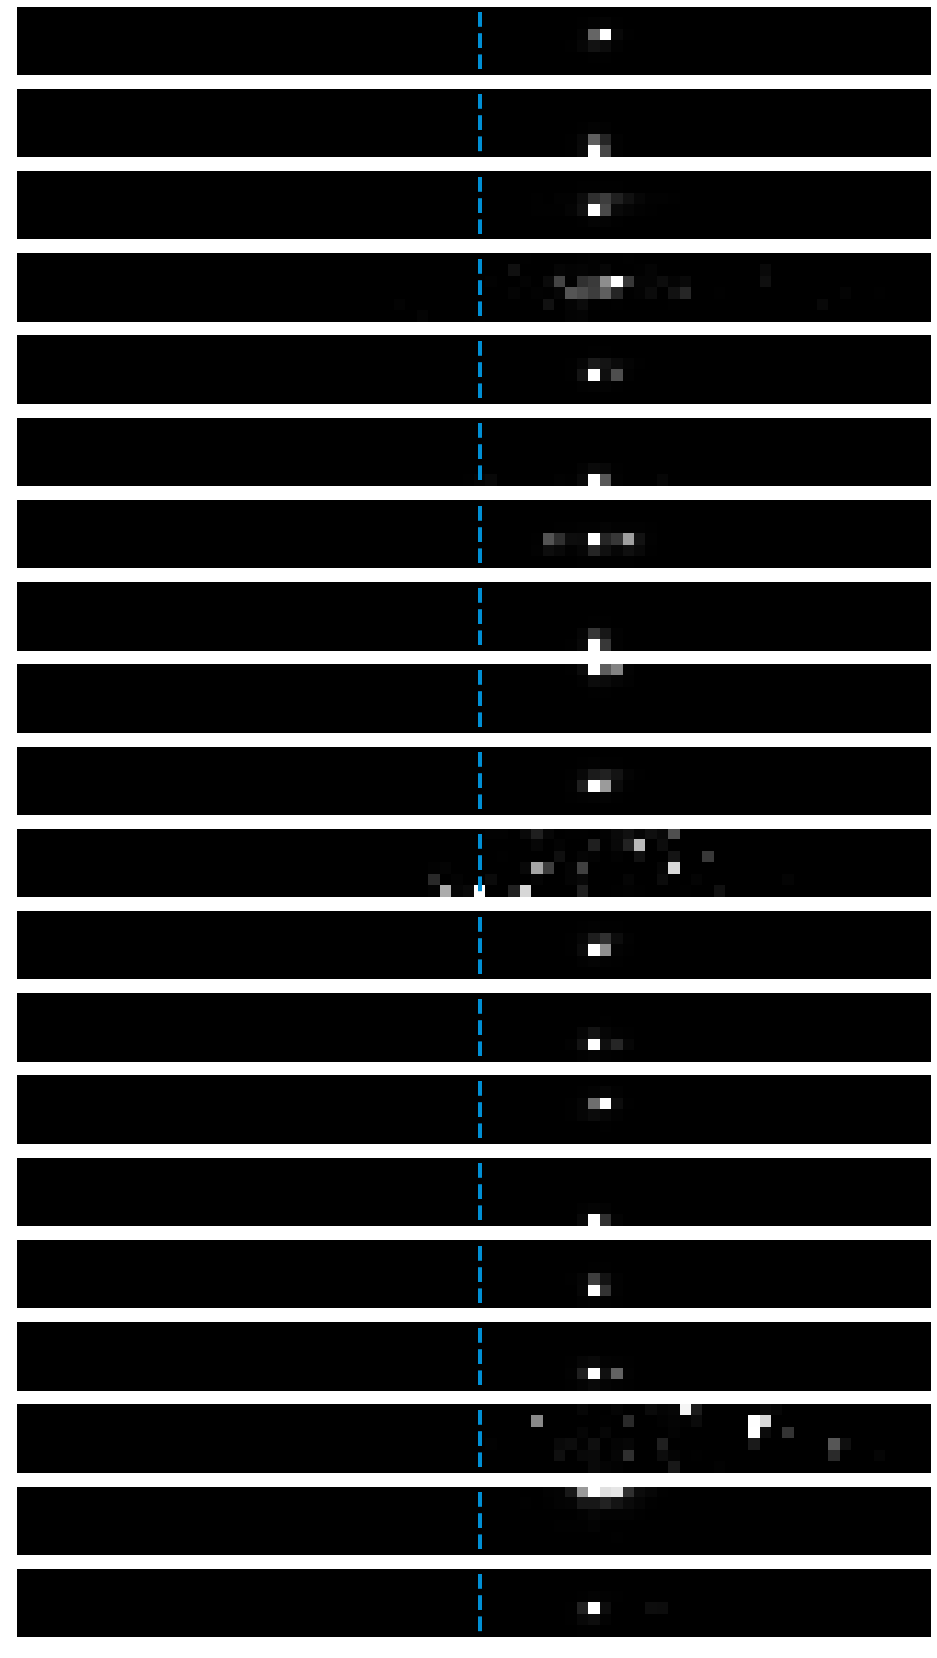

In [6]:
fig, ax = plt.subplots(N, 1, figsize=(60, 30))
for i in range(N):
    ax[i].imshow(images[i], cmap=cm.Greys_r)
    ax[i].plot([CUT_PHI, CUT_PHI], [0, 5], '--')  # helper line for visual inspection 
    ax[i].axis('off')

## Most energetic hits

In [7]:
img = np.reshape(df.mean(axis=0).values, (DIM_ETA, DIM_PHI))
img = img[..., window]
img.shape

(6, 80)

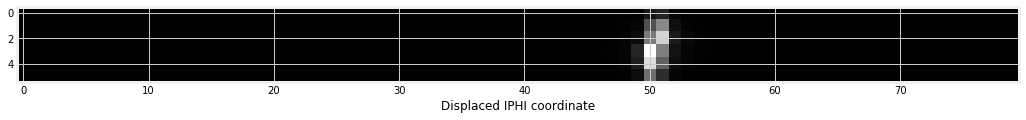

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 2))
ax.imshow(img, cmap=cm.Greys_r)
ax.set_xlabel('Displaced IPHI coordinate');

The energy deposits indicate a clock-wise curvature of the electron (actually a positron).

In [9]:
peaks = peak_local_max(img, min_distance=0, num_peaks=4)

In [10]:
peaks

array([[ 3, 50],
       [ 4, 50],
       [ 2, 51],
       [ 1, 51]])

In [11]:
img[peaks[:,0], peaks[:,1]]

array([6.96713266, 5.36076989, 5.02134596, 3.17626295])